<a href="https://colab.research.google.com/github/preekshitsaklani/diabetes-predictor/blob/main/Diabetes_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Drive and Datatset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

## Loading the Dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv'
df = pd.read_csv(dataset_path)

## Displaying the first few rows of the dataset

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Checking for missing values

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Handling duplicate rows

In [ ]:
if 'Outcome' in df.columns:
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
else:
    print("Dataset does not appear to be the correct diabetes dataset.")

## Splitting features and target variable

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Scaling the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Initializing classification models

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

## Setting up the plot for ROC curves

In [ ]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

## Training models, evaluating performance, and plotting ROC curves


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Random Forest ROC-AUC Score: 0.8134

SVM Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

SVM ROC-AUC Score: 0.8046

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    acc

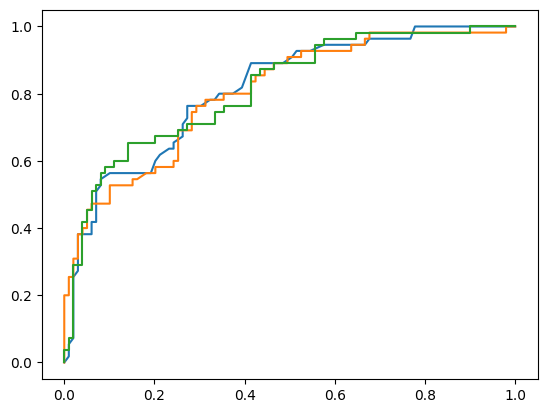

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"{name} ROC-AUC Score: {roc_auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")